 # 1. Imports

In [513]:
import numpy as np
np.random.seed(42)
import sklearn
import os
import helper
import keras
import pickle

from keras.layers.advanced_activations import LeakyReLU 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from skimage import exposure

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
import matplotlib.pyplot as plt
import random
import statistics
%matplotlib inline
import pandas as pd
% matplotlib inline

import math


import matplotlib.pyplot as plt
import random
import csv
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
from skimage import transform as transf
from sklearn.model_selection import train_test_split
import cv2
from prettytable import PrettyTable
%matplotlib inline

SEED = 22

In [514]:
checkpoint1_var = {}
checkpoint1_file = 'data/checkpoint1'
checkpoint1_force = False

# 2. Load the data

In [515]:
X_train, y_train, X_valid, y_valid, X_test, y_test = load_data()
print("data loaded")

data loaded


# 3. Explore the nature of the Data

In [516]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of validation examples.
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# The shape of an traffic sign image
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.bincount(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of validation examples = 12630
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


## Output Class Labels

In [22]:
class_labels = get_labels(y_train)
print(class_labels)

Total number of classes: 43
+-------------+----------------------------------------------------+
| class value |                Name of Traffic sign                |
+-------------+----------------------------------------------------+
|      0      |                Speed limit (20km/h)                |
|      1      |                Speed limit (30km/h)                |
|      2      |                Speed limit (50km/h)                |
|      3      |                Speed limit (60km/h)                |
|      4      |                Speed limit (70km/h)                |
|      5      |                Speed limit (80km/h)                |
|      6      |            End of speed limit (80km/h)             |
|      7      |               Speed limit (100km/h)                |
|      8      |               Speed limit (120km/h)                |
|      9      |                     No passing                     |
|      10     |    No passing for vechiles over 3.5 metric tons    |
|     

## Histogram Distributions of Train and Valid data

Dataset Training contains 39209 samples
median=1.53%  mean=2.33%
Dataset Validation contains 12630 samples
median=1.43%  mean=2.33%


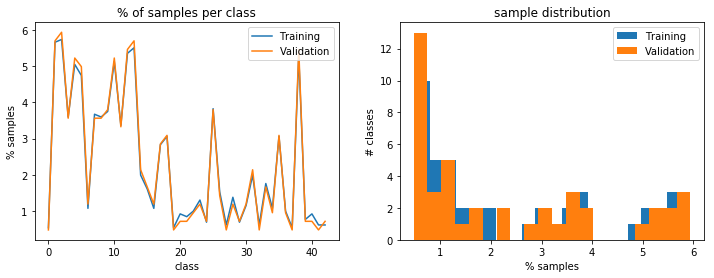

In [37]:
%matplotlib inline

# Let's check if there's similar representation of image classes in the Training and Validation datasets
y_hist = compare_distribution_histograms(data=[y_train, y_valid], descs=["Training", "Validation"])
y_train_hist = y_hist[0]
y_valid_hist = y_hist[1]

## Histogram Distribution of Train and Test Data 

Dataset Training contains 39209 samples
median=1.53%  mean=2.33%
Dataset Test contains 12630 samples
median=1.43%  mean=2.33%


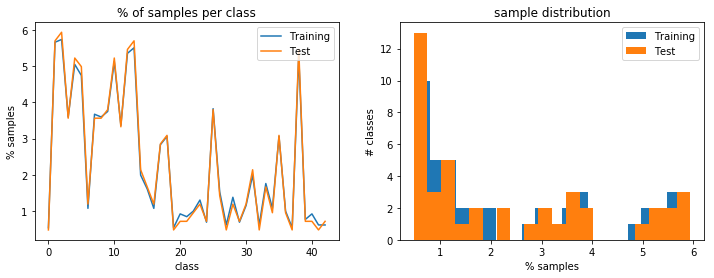

In [39]:
y_hist = compare_distribution_histograms(data=[y_train, y_test], descs=["Training", "Test"])
y_train_hist = y_hist[0]
y_test_hist = y_hist[1]

## Quantitative (Ratios) comparision of the Training and Validation datasets

In [40]:
'''
Print the validation and training datasets per-class representation stats.
The 'ratio' column shows the ratio between the class's representation in the 
training set and its representation in the validation set.
'''
ratio = y_valid_hist/y_train_hist
print("In the following table and graph, a ratio close to 1 indicates that there about the same fraction of validation samples as training samples, in the specific class.")
print("A high ratio means that the class has a larger represnetation in the validation dataset.")
print("Ratio: median={:.2f}  avg={:.2f}\n".format(statistics.median(ratio), statistics.mean(ratio)))

ratio_table = PrettyTable()
ratio_table.field_names = ["Class", "Validation", "Train", "Ratio"]
for i in range(n_classes):
    set_row = ["{:3}".format(i), "{:9.2f}%".format(y_valid_hist[i]),"{:7.2f}%".format(y_train_hist[i]),"{:6.2f}".format(ratio[i])]
    ratio_table.add_row(set_row)
    
print(ratio_table)


In the following table and graph, a ratio close to 1 indicates that there about the same fraction of validation samples as training samples, in the specific class.
A high ratio means that the class has a larger represnetation in the validation dataset.
Ratio: median=0.99  avg=0.97

+-------+------------+----------+--------+
| Class | Validation |  Train   | Ratio  |
+-------+------------+----------+--------+
|    0  |      0.48% |    0.54% |   0.89 |
|    1  |      5.70% |    5.66% |   1.01 |
|    2  |      5.94% |    5.74% |   1.03 |
|    3  |      3.56% |    3.60% |   0.99 |
|    4  |      5.23% |    5.05% |   1.03 |
|    5  |      4.99% |    4.74% |   1.05 |
|    6  |      1.19% |    1.07% |   1.11 |
|    7  |      3.56% |    3.67% |   0.97 |
|    8  |      3.56% |    3.60% |   0.99 |
|    9  |      3.80% |    3.75% |   1.01 |
|   10  |      5.23% |    5.13% |   1.02 |
|   11  |      3.33% |    3.37% |   0.99 |
|   12  |      5.46% |    5.36% |   1.02 |
|   13  |      5.70% |    5.5

## Plot the Ratio Graph (Valid/Train per Class)

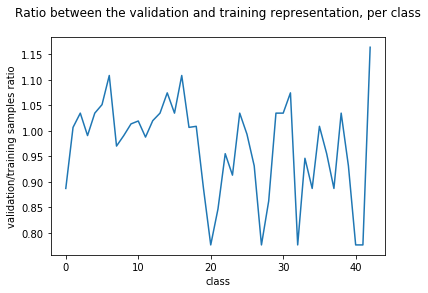

In [41]:
plt.plot(range(n_classes), y_valid_hist/y_train_hist)
plt.title('Ratio between the validation and training representation, per class\n')
plt.xlabel('class')
plt.ylabel('validation/training samples ratio')
plt.show()

In [44]:
def get_num_instances(img_class, y):
    """
    Return the number of instances for 'img_class' in dataset 'y'
    """
    y_hist = np.bincount(y)
    n_instances = y_hist[img_class]
    return n_instances

def get_imgs_for_class(img_class, X, y,count=0):
    """
    Return a list containing all of the images of class 'img_class', 
    from dataset X
    """
    n_instances = get_num_instances(img_class, y)
    if (count < n_instances and count > 0):
        n_instances = count
        print(n_instances)   
    class_images = []
    i = 0
    while n_instances>0:
        if y[i] == img_class:
            image = X[i].squeeze()
            class_images.append(image)
            n_instances -= 1
        i += 1
    return class_images

def get_imgs_for_classes(img_classes, X, y, count=-1):
    classes_imgs = []
    print(type(img_classes))
    print(len(img_classes))
    print(img_classes[1])
    print(img_classes)
    for i  in range(len(img_classes)) :
        class_imgs = get_class_images(img_classes[i],X,y)
        print(len(class_imgs))
        print(type(class_imgs))

        classes_imgs.extend(class_imgs)
    return classes_imgs
        
classes_imgs = get_imgs_for_classes((0,42), X_train, y_train)  
print(len(classes_imgs))     
class_imgs = get_class_images(0,X_train, y_train,20)
#class_mgs = get_class_images(0,X_train, y_train)


<class 'tuple'>
2
42
(0, 42)
210
<class 'list'>
240
<class 'list'>
450
20


In [396]:
def plot_image(image, nr, nc, i, label=""):
    """
    Plot a single image.
    If 'i' is greater than 0, then plot this image as 
    a subplot of a larger plot.
    """
    
    if i>0: 
        plt.subplot(nr, nc, i)
    else:
        plt.figure(figsize=(3*nr,nc))
        
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(label)
    plt.tight_layout()
    plt.imshow(image, cmap="gray")


def plot_3_datasets(dataset1, dataset2, dataset3, count=0):
    if count==0 :
            count = len(dataset1)
    nc = 3
    nr = count
    for i in range(count):

        plot_image(dataset1[i].squeeze(), nr, nc, 3*i+1)
        plot_image(dataset2[i].squeeze, nr, nc, 3*i+2)
        plot_image(dataset2[i].squeeze, nr, nc, 3*i+3)

            
#plot_2_datasets(np.asarray(dark[0:4]), conv_to_grayscale(np.asarray(dark[0:4])))    
    
def plot_2_datasets(dataset1, dataset2, count=0):
    
        if count==0 :
            count = len(dataset1)
        
      
        nc = 2
        nr = count
        
        #plt.figure(figsize=(nr,nc))
        for i in range(count):
        
            plot_image(dataset1[i].squeeze(), nr, nc, 2*i+1)
            
            image = dataset2[i].squeeze()
            plot_image(image, nr, nc, 2*i+2)
            #print("image mean=", image.mean())

#plot_2_datasets(np.asarray(dark[0:4]), conv_to_grayscale(np.asarray(dark[0:4])))        
    
def plot_images(img_class, images, ncol, desc):
    """
    Plot all of the images in the list 'class_images'
    """
    nimages = len(images)
    nrow = math.ceil(nimages/ncol)
    plt.figure(figsize=(3*nrow,ncol))
    print("class {} has {} images in the {} dataset".format(img_class,nimages, desc))
    for image,i in zip(images, range(nimages)):
        #print(i)
        plot_image(image.squeeze(), nrow, ncol, i+1)
        
#plot_images(0,X_train[0:43],9,"")
from scipy import misc
def get_image_per_class(X, y):
    """ 
    Plot a representatative of each image class in a 5x10 image grid

    The training dataset is traversed until a sample of each class
    is encountered and cached.

    Another loop then travereses all of the cached images and displays them.
    The two loops are required because we want to display the image samples
    in class order, not in the order they are encountered.
    """
    signs_left = n_classes
    class_images = [None for x in range(signs_left)]

    i = 0
    while signs_left>0:
        if class_images[y[i]] == None:
            image = X[i]
            class_images[y[i]] = image
            signs_left -= 1
        i += 1
    return class_images

def summarize_stats(class_images, y_train, y_valid):
    """
    'class_images' is a list of images, one per class.
    This function plots this images list, and print underneath each one its class, 
    the number of training samples, the percent of training samples, 
    and the percent of validation samples
    """
    # Create a histogram of the classes
    y_train_hist = np.bincount(y_train)
    y_valid_hist = np.bincount(y_valid)

    nr = 5; nc = 9
    plt.figure(figsize=(3*nr,nc))
    for image,i in zip(class_images, range(len(class_images))):
        label = (str(i) + "\n"                                            # class
              + str(y_train_hist[i]) + "\n"                               # no. of training samples
              + "{:.1f}%".format(100 * y_train_hist[i]/sum(y_train_hist))  + "\n"   # representation in training samples
              + "{:.1f}%".format(100 * y_valid_hist[i]/sum(y_valid_hist)))     # representation in validation samples
        plot_image(image.squeeze(), nr, nc, i+1, label)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 25)

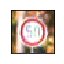

In [170]:
plot_image(X_train[3000],1,1,0)

class 0 has 2 images in the  dataset


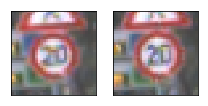

In [171]:
plot_images(0,X_train[0:2],2,"")

C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\ipykernel_launcher.py:57: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


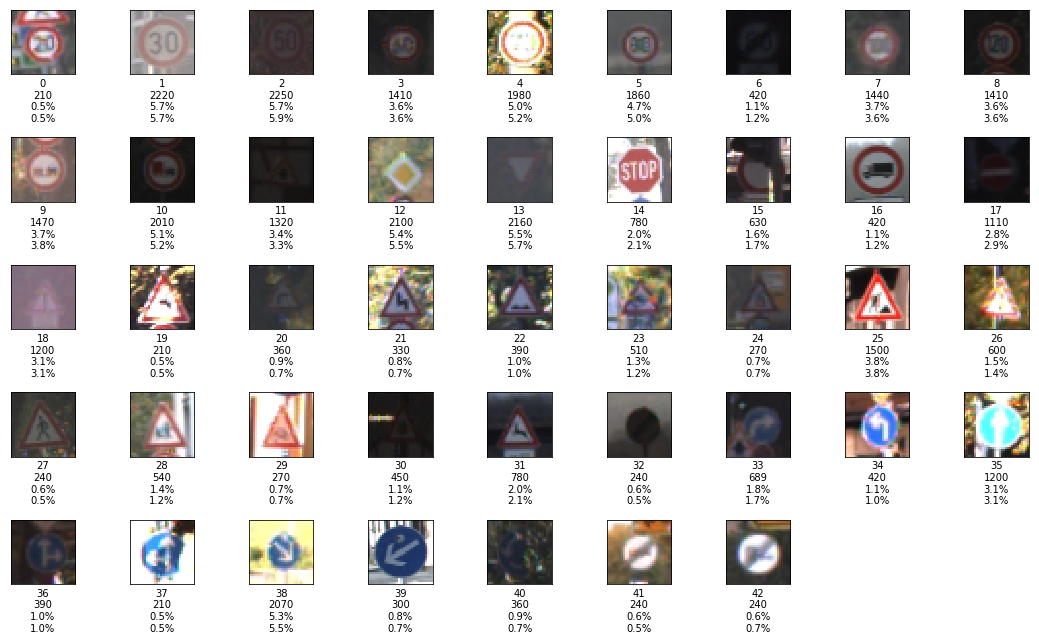

In [176]:
all_class_images = get_image_per_class(X_train, y_train)
#plot_images(0,class_images,9,"")
summarize_stats(all_class_images, y_train, y_valid)


In [203]:
class_images = get_class_images(11, X_train, y_train)
#plot_images(11,class_images,6,"")

In [197]:
mean = np.mean(X_train)
std = np.std(X_train)
samples = class_images[0:100]
sample_means = []
dark = []
bright =[]
#plot_images(11,class_images[0:100],10,"")
for i in range(len(samples)):
    img = samples[i]
    #print(i)
    img_mean = np.mean(img)
    #print(img_mean)
    if (img_mean < mean):
        
        dark.append(class_images[i])
    else:
        bright.append(class_images[i])
        
    sample_means.append(img_mean)
print(max(sample_means))
print(min(sample_means))
print(np.median(channel_means))
    #mean_x = cv2.mean(X_train[i])

247.472005208
17.7587890625
107.271484375


In [199]:
print(len(dark))
print(len(bright))

52
48


class 11 has 52 images in the  dataset


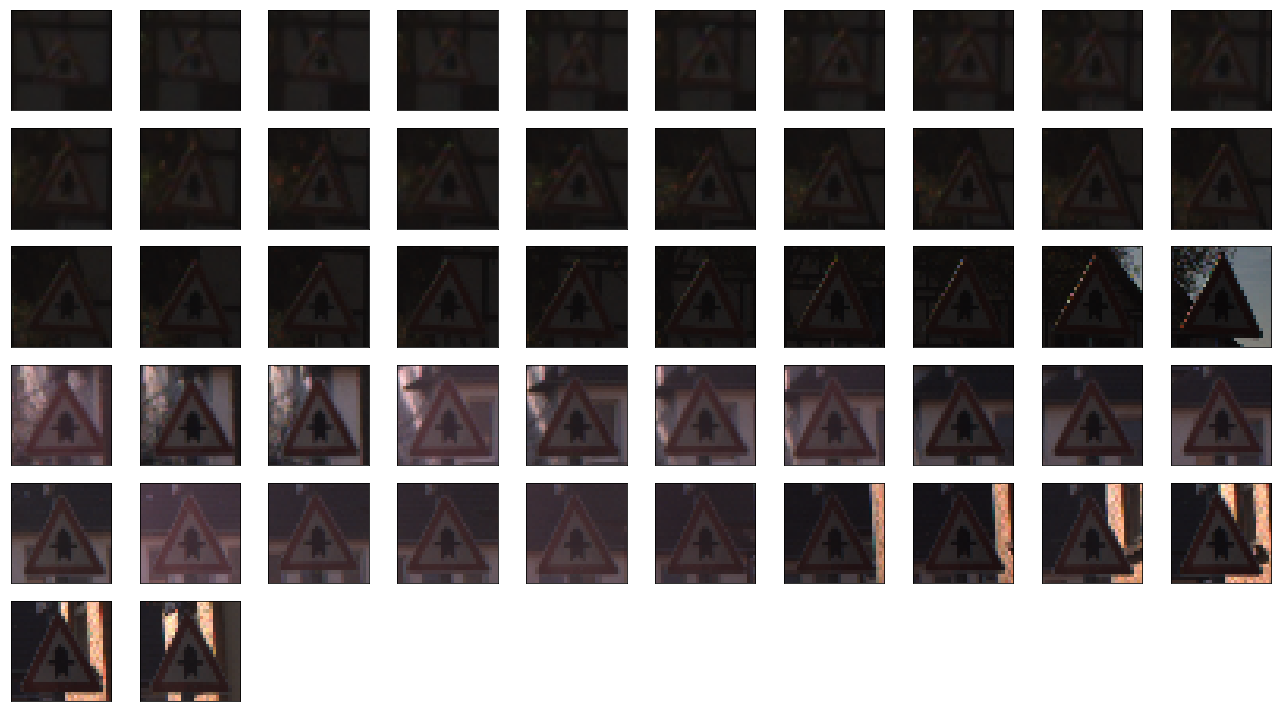

In [200]:
plot_images(11,np.asarray(dark),10,"")


class 11 has 48 images in the  dataset


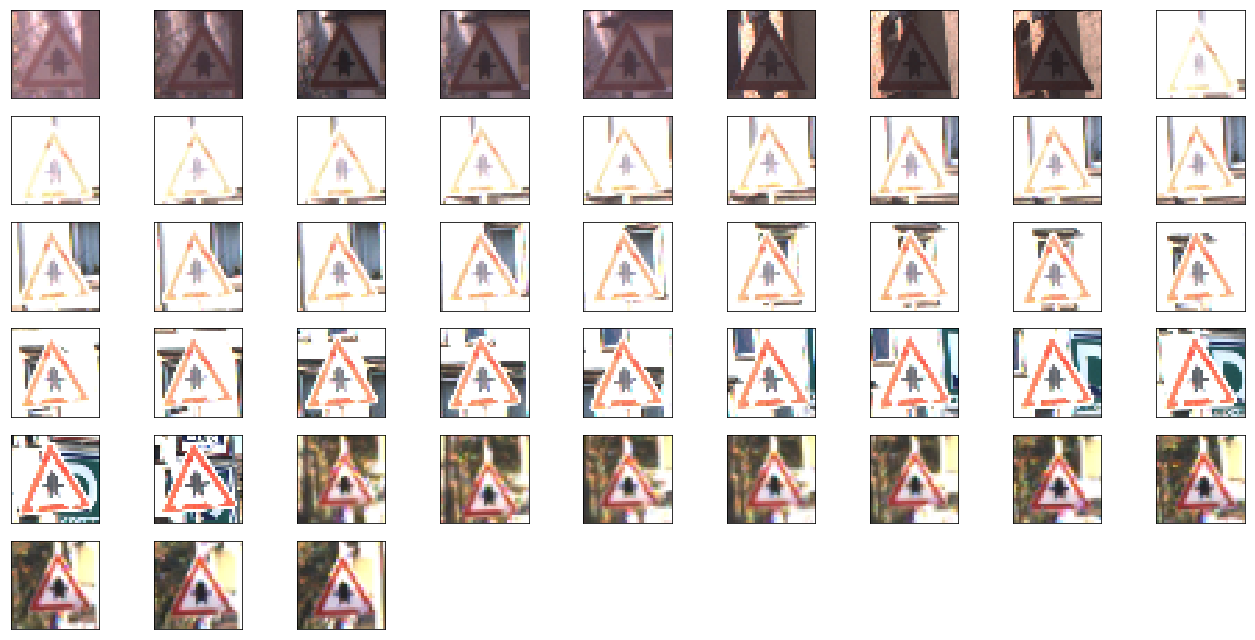

In [202]:
plot_images(11,np.asarray(bright),9,"")


In [367]:
#convert to grayscale

def conv_to_grayscale_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = np.expand_dims(img, axis=2)
    #img = np.resize(img, (img.shape[0], img.shape[1], 1))
    print(img.shape)
    return  img


def conv_to_grayscale(data):
    
    """Convert to grayscale, histogram equalize, and expand dims"""
    
    print(type(data))
    print(data.shape)

    imgs = np.ndarray((data.shape[0], 32, 32, 1), dtype=np.uint8)
    for i, img in enumerate(data):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = np.expand_dims(img, axis=2)
        #print(img.shape)

        imgs[i] = img
    #print(type(imgs))
    return imgs




<class 'numpy.ndarray'>
(4, 32, 32, 3)


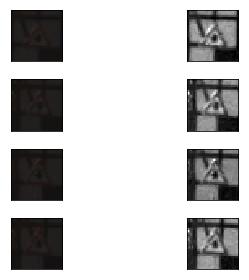

In [385]:

#dark_grey_12= conv_to_grayscale(np.asarray(dark[:12]))
#plot_images(0, dark_grey_12,4,"")
plot_2_datasets(np.asarray(dark[0:4]), conv_to_grayscale(np.asarray(dark[0:4])))        



<class 'numpy.ndarray'>
(4, 32, 32, 3)


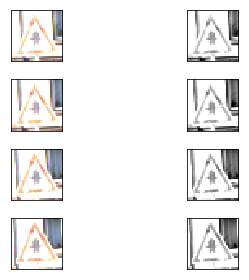

In [389]:
plot_2_datasets(np.asarray(bright[16:20]), conv_to_grayscale(np.asarray(bright[16:20])))        


In [390]:
from skimage import exposure
img_dark = dark[0]
img_bright = bright[8]
img_dark_gry = conv_to_grayscale_img(img_dark)
img_bright_gry = conv_to_grayscale_img(img_bright)

def contrast_stretch(img):
  p2, p98 = np.percentile(img, (2,98))
  img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
  return img_rescale




In [402]:
def plot_equalize_color_gray(img_dark_equal, img_dark_equal_gry, img_bright_equal, img_bright_equal_gry,op):
    plot_image(img_dark, 2,4,1, "Original Dark")
    plot_image(img_dark_equal, 2,4,2,op+" Dark")
    plot_image(img_dark_gry, 2,4,3, "Original Dark Grey")

    plot_image(img_dark_equal_gry,2,4,4, op+" Dark Grey")
    plot_image(img_bright, 2,4,5, "Original Bright")
    plot_image(img_bright_equal,2,4,6, op+" Bright")
    plot_image(img_bright_gry, 2,4,7, "Original Bright Grey")

    plot_image(img_bright_equal_gry,2,4,8, op+" Bright Grey")


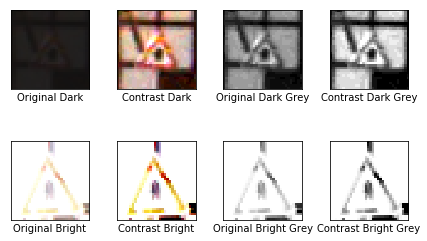

In [404]:
img_dark_contrast = contrast_stretch(img_dark)
img_bright_contrast = contrast_stretch(img_bright)
img_dark_contrast_gry = contrast_stretch(img_dark_gry)
img_bright_contrast_gry = contrast_stretch(img_bright_gry)


plot_equalize_color_gray(img_dark_contrast,img_dark_contrast_gry,img_bright_contrast,img_bright_contrast_gry,"Contrast")


In [407]:
def hist_equalize_data(dataset):
    data_eq = exposure.equalize_hist(dataset)
    return data_eq

def hist_equalize(img):

    img_eq = exposure.equalize_hist(img)

    return img_eq


#data_norm = noralize(np.asarray((img_dark, img_bright)), mean, std)
#data_eq = hist_equalize_data(data_norm)
#plot_images(11, data_eq, 2,"")
#plot_images(11, data_norm, 2,"")


C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


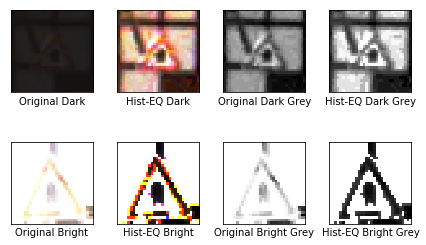

In [408]:
img_dark_hist = hist_equalize(img_dark)
img_bright_hist = hist_equalize(img_bright)
img_dark_hist_gry = hist_equalize(img_dark_gry)
img_bright_hist_gry = hist_equalize(img_bright_gry)
plot_equalize_color_gray(img_dark_hist,img_dark_hist_gry,img_bright_hist,img_bright_hist_gry,"Hist-EQ")


In [409]:
def adaptive_equalize_data(data):
    data_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
    return data_adapteq

def adaptive_equalize(img):
    img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
    return img_adapteq






C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


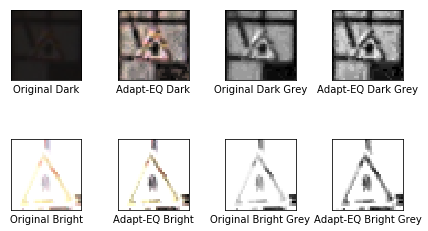

In [410]:
img_dark_adapteq = adaptive_equalize(img_dark)
img_bright_adapteq = adaptive_equalize(img_bright)
img_dark_adapteq_gry = adaptive_equalize(img_dark_gry)
img_bright_adapteq_gry = adaptive_equalize(img_bright_gry)
plot_equalize_color_gray(img_dark_adapteq,img_dark_adapteq_gry,img_bright_adapteq,img_bright_adapteq_gry,"Adapt-EQ")



In [411]:
from skimage import data, img_as_float, exposure, io

def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box-forced')

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

In [229]:
#### Everything below here is just to create the plot/graphs ####
# Display results
def hist_compare(img, img_contrast, img_hist, img_adapteq):
    fig = plt.figure(figsize=(10, 7)) 
    axes = np.zeros((2, 4), dtype=np.object)
    axes[0, 0] = fig.add_subplot(2, 4, 1)

    for i in range(1, 4):
        axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])

    for i in range(0, 4):
        axes[1, i] = fig.add_subplot(2, 4, 5+i)

    ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
    ax_img.set_title('Low contrast image')

    y_min, y_max = ax_hist.get_ylim()
    ax_hist.set_ylabel('Number of pixels')

    ax_hist.set_yticks(np.linspace(0, y_max, 5))
    ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_contrast, axes[:, 1])
    ax_img.set_title('Contrast stretching')

    ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_hist, axes[:, 2])
    ax_img.set_title('Histogram equalization')

    ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
    ax_img.set_title('Adaptive equalization')
    ax_cdf.set_ylabel('Fraction of total intensity')
    ax_cdf.set_yticks(np.linspace(0, 1, 5))

    # prevent overlap of y-axis labels
    fig.tight_layout()
    plt.show()

C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


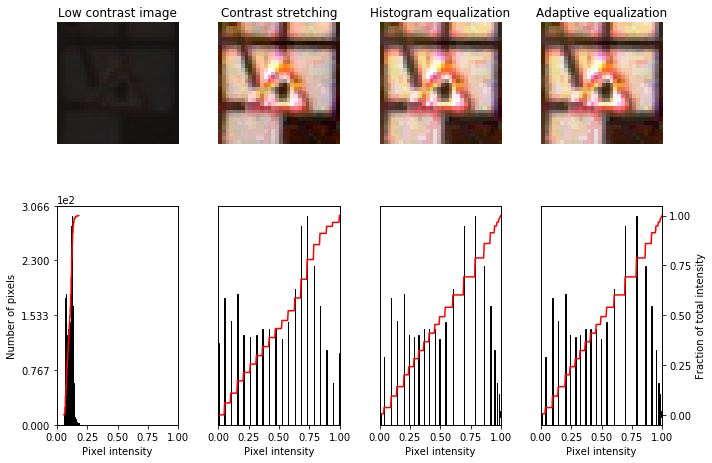

In [230]:
hist_compare(img_dark, img_dark_contrast, img_dark_hist, img_dark_adapteq)

C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


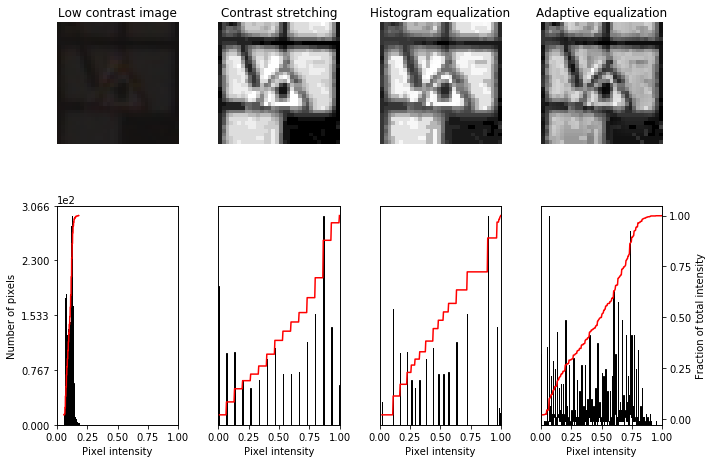

In [412]:
hist_compare(img_dark, img_dark_contrast_gry, img_dark_hist_gry, img_dark_adapteq_gry)

C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


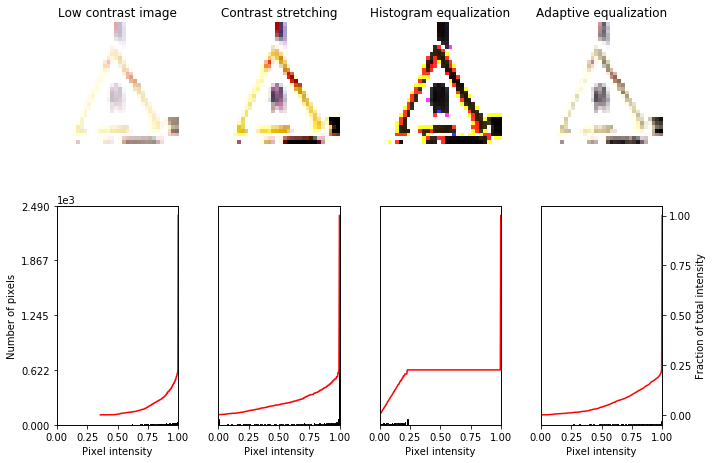

In [413]:
hist_compare(img_bright, img_bright_contrast, img_bright_hist, img_bright_adapteq)

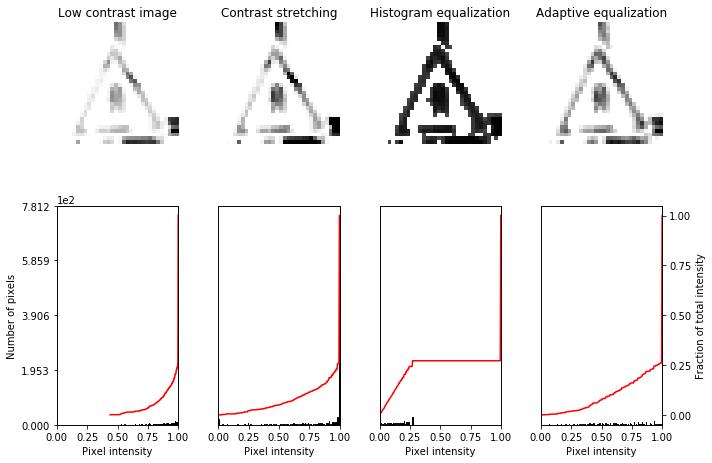

In [414]:
hist_compare(img_bright_gry, img_bright_contrast_gry, img_bright_hist_gry, img_bright_adapteq_gry)

In [237]:
def noralize (dataset, mean, std):
    dataset = (dataset - mean) / std
    print("Dataset length: ", len(dataset))
   
    return dataset

def center_normalize(data, mean, std):
    """Center normalize images"""
    data = data.astype('float32')
    data -= mean
    data /= std
    return data


def center_normalize_img(img, mean, std):
    """Center normalize images"""
    img = img.astype('float32')
    img -= mean
    img /= std
    return img

mean = np.mean(X_train)
std = np.std(X_train)

Dataset length:  4


C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


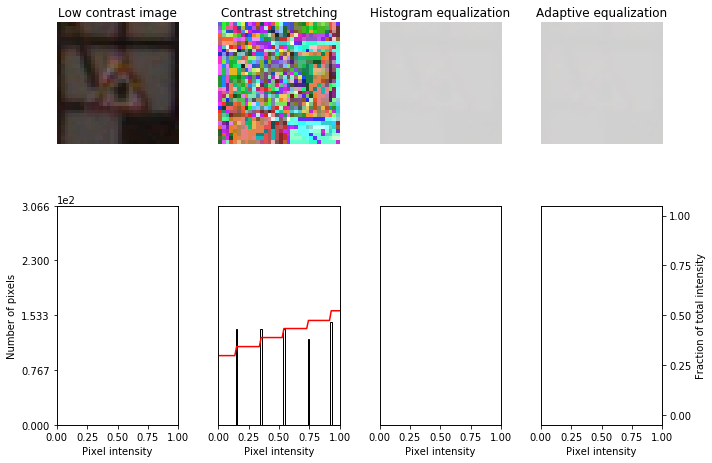

In [254]:
hist_images = (img_dark, img_dark_contrast, img_dark_hist, img_dark_adapteq)
normalize = noralize(np.asarray(hist_images),mean, std)
hist_compare(normalize[0], normalize[1], normalize[2], normalize[3])

In [424]:
#Preprocess
def preprocess_color(data):
    data=hist_equalize(data)
    
    
    return data



#changed_dark_images = preprocess(np.asarray(dark))
#plot_images(11, changed_images, 7, "")
#changed_bright_images = preprocess(np.asarray(bright))

#plot_images(11, changed_bright_images, 7, "")


In [434]:
def preprocess_gry(data):
    
    data = conv_to_grayscale(data)
    data=hist_equalize(data)
    
    
    return data


In [517]:
X_train_color= preprocess_color(X_train)
X_valid_color = preprocess_color(X_valid)
X_test_color = preprocess_color(X_test)

In [518]:
X_train_gry= preprocess_gry(X_train)
X_valid_gry = preprocess_gry(X_valid)
X_test_gry = preprocess_gry(X_test)

<class 'numpy.ndarray'>
(39209, 32, 32, 3)
<class 'numpy.ndarray'>
(12630, 32, 32, 3)
<class 'numpy.ndarray'>
(12630, 32, 32, 3)


In [519]:
#shuffle
X_train_color, y_train = shuffle(X_train_color, y_train, random_state=42)
X_test_color, y_test= shuffle(X_test_color, y_test, random_state=42)
X_valid_color, y_valid = shuffle(X_valid_color, y_valid, random_state = 42)
#shuffle
X_train_gry, y_train = shuffle(X_train_gry, y_train, random_state=42)
X_test_gry, y_test= shuffle(X_test_gry, y_test, random_state=42)
X_valid_gry, y_valid = shuffle(X_valid_gry, y_valid, random_state = 42)
    
    

C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\ipykernel_launcher.py:71: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


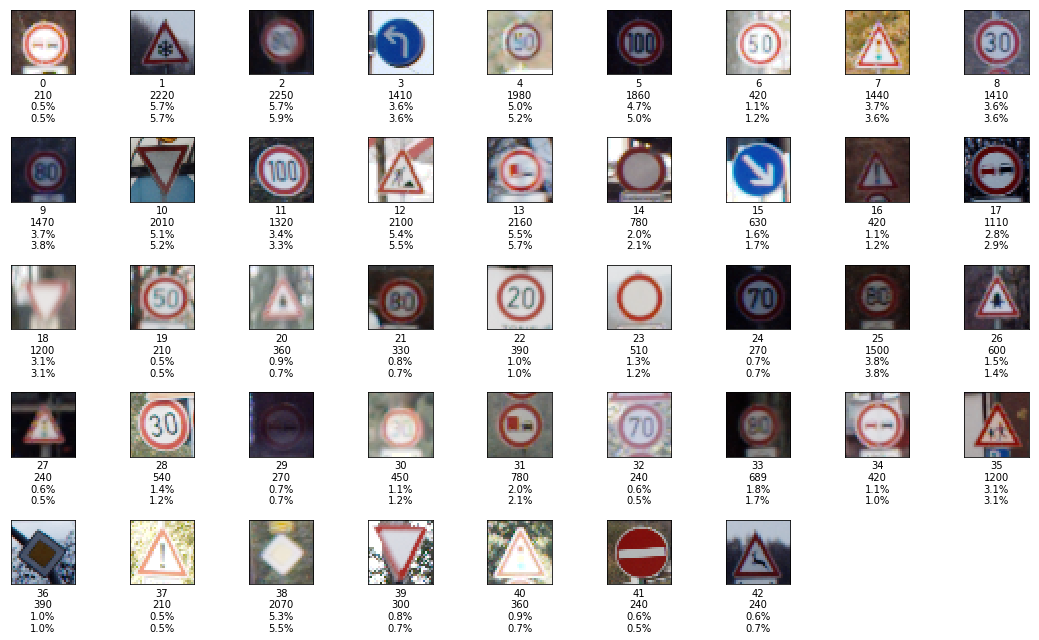

In [520]:
all_class_images = get_image_per_class(X_train_color, y_train)
#plot_images(0,class_images,9,"")
summarize_stats(all_class_images, y_train, y_valid)

C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\ipykernel_launcher.py:71: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


(43, 32, 32, 1)


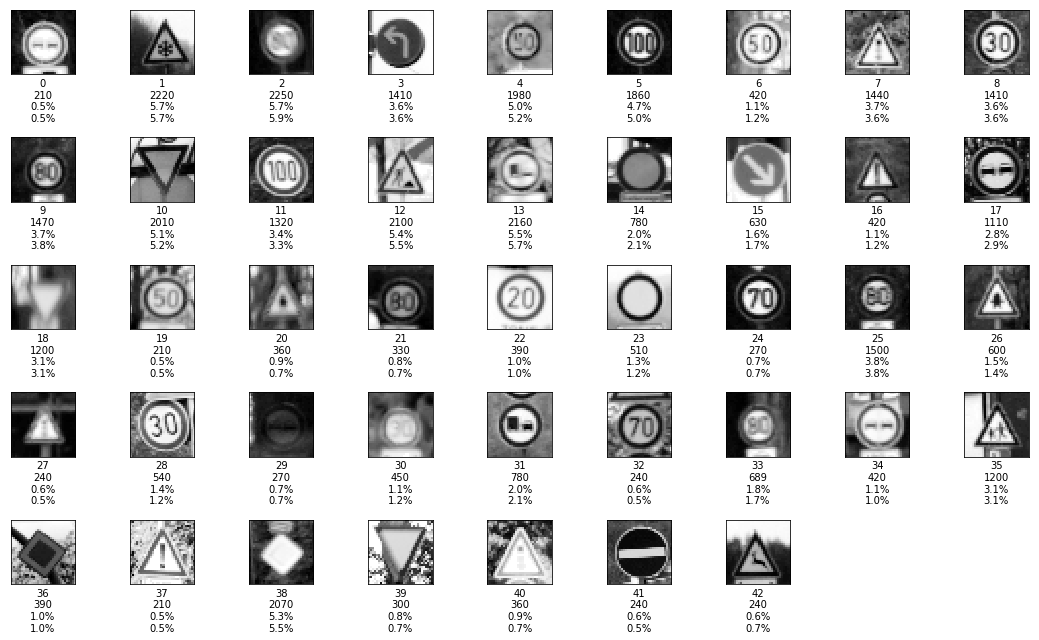

In [521]:
all_class_images_gry = get_image_per_class(X_train_gry, y_train)
#plot_images(0,class_images,9,"")
summarize_stats(all_class_images_gry, y_train, y_valid)
print(np.asarray(all_class_images_gry).shape)

In [522]:
print(X_train.shape)

(39209, 32, 32, 3)


# AUGMENT

In [523]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest',
   # horizontal_flip=True,
)

In [496]:

print(img_shape)
print(np.asarray(img_shape))
print(type(img_shape))

[0, 32, 32, 3]
[ 0 32 32  3]
<class 'list'>


In [528]:
import os
import numpy as np
from tqdm import tqdm
from sklearn.utils import shuffle

def data_augment(X,y):

    img_shape = [X.shape[1], X.shape[2], X.shape[3]]
    img_shape.insert(0,0)
    data_shape = np.asarray(img_shape)
    total_image_per_class = 3
    
    
    
    X_augmented = np.empty(data_shape)
    print(type(X_augmented))
    print(X_augmented.shape)
    y_augmented = np.empty(0,dtype='uint8')
    


    print('Augmenting Data...')
    for i in tqdm(range(n_classes)):
    #for i in tqdm(range(3)):
            print(i)
            index = [y==i]
            images_for_i_class = X[y==i]
            #plot_image(images_for_i_class[0],1,1,0,"")
            y_i_class = y[y==i]
            #print(i)
            #print(len(images_for_i_class))
            #print(len(y_i_class))


            X_augmented_i = np.copy(images_for_i_class)
            y_augmented_i = np.copy(y_i_class)
            print(len(X_augmented_i))

            for X_b,y_b in datagen.flow(images_for_i_class, y_i_class, batch_size=len(y_i_class), seed=9345+i*37):            
                X_augmented_i = np.append(X_augmented_i, X_b, axis=0)
                #print(len(X))
                #print(len(X_augmented_i))
                #print(X_augmented_i.shape)
                #plot_images(i,X[:4],4,"")

                y_augmented_i = np.append(y_augmented_i, y_b, axis=0)

                if len(X_augmented_i) >= total_image_per_class:
                    #print("break")
                    break
            
            #print(X_augmented.shape)
            X_augmented = np.append(X_augmented, X_augmented_i, axis=0)
            y_augmented = np.append(y_augmented, y_augmented_i, axis=0)     

            print(len(X_augmented))
    X_augmented, y_augmented = shuffle(X_augmented, y_augmented, random_state=9345)
    return X_augmented, y_augmented
    
    # Storing for checkpoint2
    #X_augmented = X_augmented.astype('float32')


In [529]:
X_aug_color, y_aug = data_augment(X_train_color, y_train)
X_aug_gry, y_aug = data_augment(X_train_gry, y_train)

<class 'numpy.ndarray'>
(0, 32, 32, 3)
Augmenting Data...



  0%|                                                                                           | 0/43 [00:00<?, ?it/s]

0
210
420
1
2220
4860



  5%|███▊                                                                               | 2/43 [00:00<00:18,  2.19it/s]

2
2250
9360



  7%|█████▊                                                                             | 3/43 [00:01<00:23,  1.68it/s]

3
1410
12180



  9%|███████▋                                                                           | 4/43 [00:02<00:24,  1.57it/s]

4
1980
16140



 12%|█████████▋                                                                         | 5/43 [00:03<00:27,  1.40it/s]

5
1860
19860



 14%|███████████▌                                                                       | 6/43 [00:04<00:28,  1.31it/s]

6
420
20700



 16%|█████████████▌                                                                     | 7/43 [00:04<00:24,  1.50it/s]

7
1440
23580



 19%|███████████████▍                                                                   | 8/43 [00:05<00:24,  1.40it/s]

8
1410
26400



 21%|█████████████████▎                                                                 | 9/43 [00:06<00:25,  1.35it/s]

9
1470
29340



 23%|███████████████████                                                               | 10/43 [00:07<00:26,  1.23it/s]

10
2010
33360



 26%|████████████████████▉                                                             | 11/43 [00:08<00:29,  1.10it/s]

11
1320


36000


 28%|██████████████████████▉                                                           | 12/43 [00:09<00:31,  1.00s/it]

12
2100
40200


 30%|████████████████████████▊                                                         | 13/43 [00:11<00:34,  1.14s/it]

13
2160
44520


 33%|██████████████████████████▋                                                       | 14/43 [00:12<00:38,  1.32s/it]

14
780
46080


 35%|████████████████████████████▌                                                     | 15/43 [00:14<00:35,  1.27s/it]

15
630
47340


 37%|██████████████████████████████▌                                                   | 16/43 [00:15<00:31,  1.17s/it]

16
420
48180


 40%|████████████████████████████████▍                                                 | 17/43 [00:15<00:28,  1.10s/it]

17
1110
50400


 42%|██████████████████████████████████▎                                               | 18/43 [00:17<00:28,  1.14s/it]

18
1200
52800


 44%|████████████████████████████████████▏                                             | 19/43 [00:18<00:28,  1.18s/it]

19
210
53220


 47%|██████████████████████████████████████▏                                           | 20/43 [00:19<00:24,  1.07s/it]

20
360
53940


 49%|████████████████████████████████████████                                          | 21/43 [00:20<00:22,  1.01s/it]

21
330
54600


 51%|█████████████████████████████████████████▉                                        | 22/43 [00:21<00:20,  1.01it/s]

22
390
55380


 53%|███████████████████████████████████████████▊                                      | 23/43 [00:22<00:20,  1.01s/it]

23
510
56400


 56%|█████████████████████████████████████████████▊                                    | 24/43 [00:23<00:18,  1.01it/s]

24
270
56940


 58%|███████████████████████████████████████████████▋                                  | 25/43 [00:23<00:16,  1.06it/s]

25
1500
59940


 60%|█████████████████████████████████████████████████▌                                | 26/43 [00:25<00:18,  1.09s/it]

26
600
61140


 63%|███████████████████████████████████████████████████▍                              | 27/43 [00:26<00:17,  1.07s/it]

27
240
61620


 65%|█████████████████████████████████████████████████████▍                            | 28/43 [00:27<00:15,  1.00s/it]

28
540
62700


 67%|███████████████████████████████████████████████████████▎                          | 29/43 [00:28<00:13,  1.00it/s]

29
270
63240


 70%|█████████████████████████████████████████████████████████▏                        | 30/43 [00:29<00:12,  1.01it/s]

30
450
64140


 72%|███████████████████████████████████████████████████████████                       | 31/43 [00:30<00:11,  1.01it/s]

31
780
65700


 74%|█████████████████████████████████████████████████████████████                     | 32/43 [00:31<00:12,  1.11s/it]

32
240
66180


 77%|██████████████████████████████████████████████████████████████▉                   | 33/43 [00:33<00:12,  1.21s/it]

33
689
67558


 79%|████████████████████████████████████████████████████████████████▊                 | 34/43 [00:34<00:11,  1.24s/it]

34
420
68398


 81%|██████████████████████████████████████████████████████████████████▋               | 35/43 [00:35<00:09,  1.20s/it]

35
1200
70798


 84%|████████████████████████████████████████████████████████████████████▋             | 36/43 [00:36<00:09,  1.31s/it]

36
390
71578


 86%|██████████████████████████████████████████████████████████████████████▌           | 37/43 [00:38<00:07,  1.28s/it]

37
210
71998


 88%|████████████████████████████████████████████████████████████████████████▍         | 38/43 [00:39<00:06,  1.23s/it]

38
2070
76138


 91%|██████████████████████████████████████████████████████████████████████████▎       | 39/43 [00:41<00:06,  1.51s/it]

39
300
76738


 93%|████████████████████████████████████████████████████████████████████████████▎     | 40/43 [00:43<00:04,  1.61s/it]

40
360
77458


 95%|██████████████████████████████████████████████████████████████████████████████▏   | 41/43 [00:44<00:03,  1.51s/it]

41
240
77938


 98%|████████████████████████████████████████████████████████████████████████████████  | 42/43 [00:45<00:01,  1.40s/it]

42
240
78418


100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:46<00:00,  1.33s/it]


<class 'numpy.ndarray'>
(0, 32, 32, 1)
Augmenting Data...


  0%|                                                                                           | 0/43 [00:00<?, ?it/s]

0
210
420


  2%|█▉                                                                                 | 1/43 [00:00<00:09,  4.66it/s]

1
2220
4860


  5%|███▊                                                                               | 2/43 [00:01<00:22,  1.86it/s]

2
2250
9360


  7%|█████▊                                                                             | 3/43 [00:02<00:24,  1.61it/s]

3
1410
12180


  9%|███████▋                                                                           | 4/43 [00:02<00:22,  1.76it/s]

4
1980
16140


 12%|█████████▋                                                                         | 5/43 [00:03<00:21,  1.79it/s]

5
1860
19860


 14%|███████████▌                                                                       | 6/43 [00:03<00:20,  1.82it/s]

6
420
20700


 16%|█████████████▌                                                                     | 7/43 [00:04<00:17,  2.08it/s]

7
1440
23580


 19%|███████████████▍                                                                   | 8/43 [00:04<00:15,  2.20it/s]

8
1410
26400


 21%|█████████████████▎                                                                 | 9/43 [00:04<00:14,  2.29it/s]

9
1470
29340


 23%|███████████████████                                                               | 10/43 [00:05<00:14,  2.32it/s]

10
2010
33360


 26%|████████████████████▉                                                             | 11/43 [00:05<00:14,  2.18it/s]

11
1320
36000


 28%|██████████████████████▉                                                           | 12/43 [00:06<00:14,  2.19it/s]

12
2100
40200


 30%|████████████████████████▊                                                         | 13/43 [00:06<00:14,  2.06it/s]

13
2160
44520


 33%|██████████████████████████▋                                                       | 14/43 [00:07<00:14,  1.96it/s]

14
780
46080


 35%|████████████████████████████▌                                                     | 15/43 [00:07<00:12,  2.16it/s]

15
630
47340


 37%|██████████████████████████████▌                                                   | 16/43 [00:08<00:11,  2.36it/s]

16
420
48180


 40%|████████████████████████████████▍                                                 | 17/43 [00:08<00:10,  2.59it/s]

17
1110
50400


 42%|██████████████████████████████████▎                                               | 18/43 [00:08<00:09,  2.53it/s]

18
1200
52800


 44%|████████████████████████████████████▏                                             | 19/43 [00:09<00:09,  2.43it/s]

19
210
53220


 47%|██████████████████████████████████████▏                                           | 20/43 [00:09<00:08,  2.67it/s]

20
360
53940


 49%|████████████████████████████████████████                                          | 21/43 [00:09<00:07,  2.79it/s]

21
330
54600


 51%|█████████████████████████████████████████▉                                        | 22/43 [00:10<00:07,  2.90it/s]

22
390
55380


 53%|███████████████████████████████████████████▊                                      | 23/43 [00:10<00:06,  2.98it/s]

23
510
56400


 56%|█████████████████████████████████████████████▊                                    | 24/43 [00:10<00:06,  2.92it/s]

24
270
56940


 58%|███████████████████████████████████████████████▋                                  | 25/43 [00:11<00:05,  3.02it/s]

25
1500
59940


 60%|█████████████████████████████████████████████████▌                                | 26/43 [00:11<00:06,  2.51it/s]

26
600
61140


 63%|███████████████████████████████████████████████████▍                              | 27/43 [00:12<00:06,  2.54it/s]

27
240
61620


 65%|█████████████████████████████████████████████████████▍                            | 28/43 [00:12<00:05,  2.68it/s]

28
540
62700


 67%|███████████████████████████████████████████████████████▎                          | 29/43 [00:12<00:05,  2.64it/s]

29
270
63240


 70%|█████████████████████████████████████████████████████████▏                        | 30/43 [00:13<00:04,  2.76it/s]

30
450
64140


 72%|███████████████████████████████████████████████████████████                       | 31/43 [00:13<00:04,  2.76it/s]

31
780
65700


 74%|█████████████████████████████████████████████████████████████                     | 32/43 [00:13<00:04,  2.63it/s]

32
240
66180


 77%|██████████████████████████████████████████████████████████████▉                   | 33/43 [00:14<00:03,  2.69it/s]

33
689
67558


 79%|████████████████████████████████████████████████████████████████▊                 | 34/43 [00:14<00:03,  2.51it/s]

34
420
68398


 81%|██████████████████████████████████████████████████████████████████▋               | 35/43 [00:15<00:03,  2.56it/s]

35
1200
70798


 84%|████████████████████████████████████████████████████████████████████▋             | 36/43 [00:15<00:02,  2.35it/s]

36
390
71578


 86%|██████████████████████████████████████████████████████████████████████▌           | 37/43 [00:16<00:02,  2.45it/s]

37
210
71998


 88%|████████████████████████████████████████████████████████████████████████▍         | 38/43 [00:16<00:01,  2.56it/s]

38
2070
76138


 91%|██████████████████████████████████████████████████████████████████████████▎       | 39/43 [00:17<00:01,  2.12it/s]

39
300
76738


 93%|████████████████████████████████████████████████████████████████████████████▎     | 40/43 [00:17<00:01,  2.24it/s]

40
360
77458


 95%|██████████████████████████████████████████████████████████████████████████████▏   | 41/43 [00:17<00:00,  2.27it/s]

41
240
77938


 98%|████████████████████████████████████████████████████████████████████████████████  | 42/43 [00:18<00:00,  2.38it/s]

42
240
78418


100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:18<00:00,  2.46it/s]


In [530]:
print(X_aug_color.shape)
print(X_aug_gry.shape)


(78418, 32, 32, 3)
(78418, 32, 32, 1)


class 11 has 30 images in the  dataset


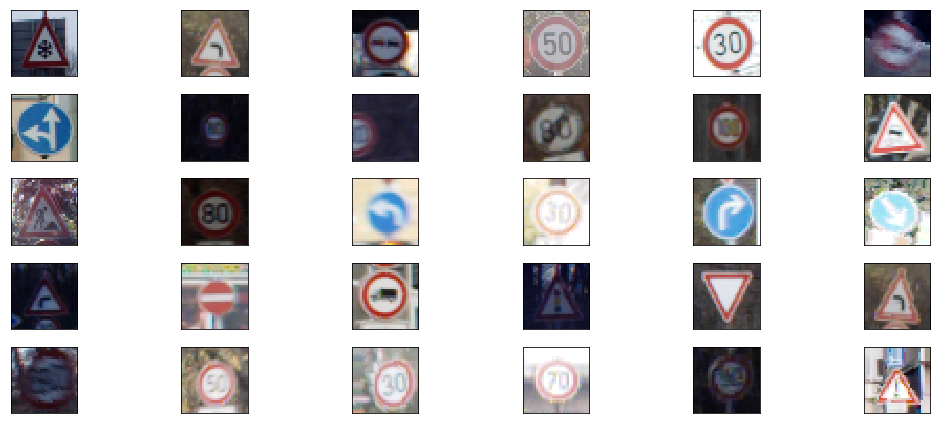

In [531]:
plot_images(11,X_aug_color[100:130],6,"")

class 11 has 30 images in the  dataset


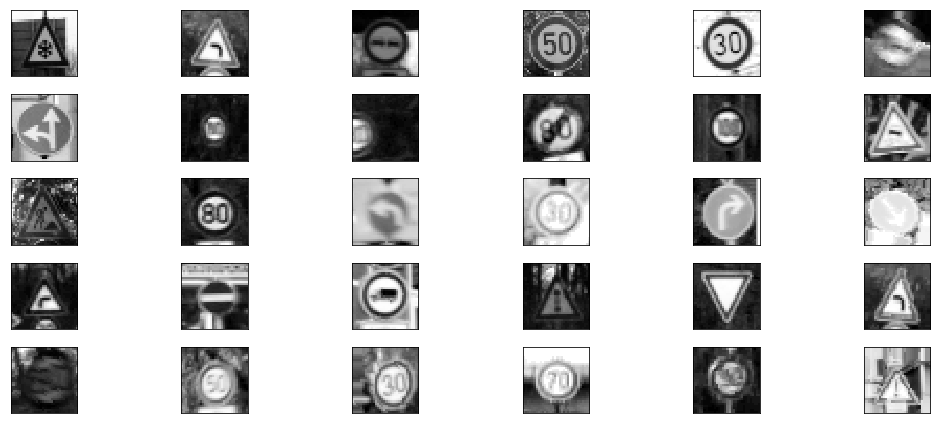

In [532]:
plot_images(11,X_aug_gry[100:130],6,"")

In [533]:
#Save to Disk

# Save the data for easy access

pickle_file = 'preprocessed_color.p'
#if not os.path.isfile(pickle_file):
print('Saving data to pickle file...')
try:
        with open(pickle_file, 'wb') as pfile:
            pickle.dump(
                {
                    'y_train': y_train,
                    'X_train_color': X_train_color,
                    'X_valid_color': X_valid_color,
                    'y_valid': y_valid,
                    'X_test_color': X_test_color,
                    'y_test': y_test,
                    'X_train_aug': X_aug_color,
                    'y_train_aug':y_aug
                    
                },
                pfile, pickle.HIGHEST_PROTOCOL)
except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')
print(X_train_color.shape[1:])
assert(X_train_color.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
    

Saving data to pickle file...
Data cached in pickle file.
(32, 32, 3)


In [535]:
#Save to Disk

# Save the data for easy access

pickle_file = 'preprocessed_gry.p'
#if not os.path.isfile(pickle_file):
print('Saving data to pickle file...')
try:
        with open(pickle_file, 'wb') as pfile:
            pickle.dump(
                {
                    'y_train': y_train,
                    'X_train_gry': X_train_gry,
                    'X_valid_gry': X_valid_gry,
                    'y_valid': y_valid,
                    'X_test_gry': X_test_gry,
                    'y_test': y_test,
                    'X_train_aug': X_aug_gry,
                    'y_train_aug':y_aug
                    
                },
                pfile, pickle.HIGHEST_PROTOCOL)
except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')
print(X_train_gry.shape[1:])
assert(X_train_gry.shape[1:] == (32,32,1)), "The dimensions of the images are not 32 x 32 x 1."
    

Saving data to pickle file...
Data cached in pickle file.
(32, 32, 3)


AssertionError: The dimensions of the images are not 32 x 32 x 1.